# Introducción

La empresa OnlyGiant requiere realizar un análisis en base a la información de sus pozos, para realizar perforaciones en lugares con mayor probabilidad de mayores reservas, esto con el fin de optimizar recursos y aumentar retornos.

Para este problema se desarrollrá un modelo de regresión lineal para identificar los mejores lugares para perforar un pozo petrolero basado en el volumen de reservas.

# Inicializción

In [27]:
# Importamos las librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# Carga de datos

In [28]:
# Cargamos los datos en variables distintas.
try:    
    geo1 = pd.read_csv('/datasets/geo_data_0.csv')
    geo2 = pd.read_csv('/datasets/geo_data_1.csv')
    geo3 = pd.read_csv('/datasets/geo_data_2.csv')
    
except:
    geo1 = pd.read_csv('geo_data_0.csv')
    geo2 = pd.read_csv('geo_data_1.csv')
    geo3 = pd.read_csv('geo_data_2.csv')    

In [29]:
# Verificamos los dataos 
geo1.info()
geo2.info()
geo3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null 

In [30]:
geo1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [31]:
geo2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [32]:
geo3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


# Preparación de datos

## Depuración de características

In [33]:
# Depuramos el id de los cojuntos de datos ya que no aportan valor a nuestro proceso de entrenamiento.
geo1 = geo1.drop('id', axis= 1)
geo2 = geo2.drop('id', axis= 1)
geo3 = geo3.drop('id', axis= 1)

In [34]:
geo1.head()

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


In [35]:
geo2.head()

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305


In [36]:
geo3.head()

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746


## Segmentación de datos

In [37]:
#Dividimos los conjuntos de datos en características y objetivo.
x_geo1 = geo1.drop('product', axis= 1)
y_geo1 = geo1['product']

x_geo2 = geo2.drop('product', axis= 1)
y_geo2 = geo2['product']

x_geo3 = geo3.drop('product', axis= 1)
y_geo3 = geo3['product']

# Dividimos las conjuntos en entrenamiento y objetivos.
x_geo1_train, x_geo1_test, y_geo1_train, y_geo1_test = train_test_split(x_geo1, y_geo1, test_size= 0.25, random_state= 42)
x_geo2_train, x_geo2_test, y_geo2_train, y_geo2_test = train_test_split(x_geo2, y_geo2, test_size= 0.25, random_state= 42)
x_geo3_train, x_geo3_test, y_geo3_train, y_geo3_test = train_test_split(x_geo3, y_geo3, test_size= 0.25, random_state= 42)

## Codificación de datos

Ya que los conjuntos de datos están en tipo float y además no existen valores ausentes, no será necesario realizar una codificación.

## Estandarización de datos

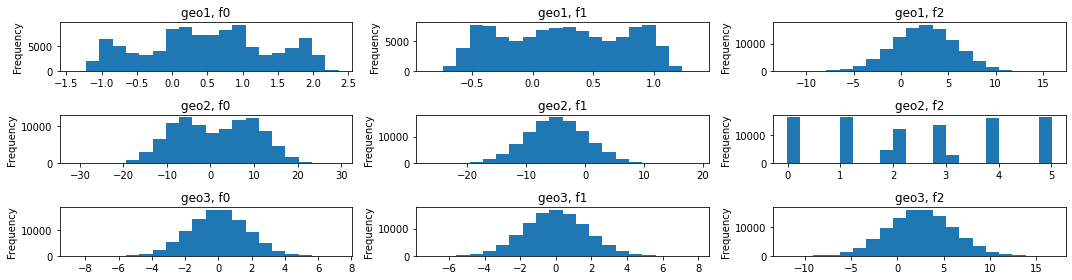

In [38]:
# Visualizamos la distribución de las características para validar los randos de los valores.
dataframes = []
dataframes.append(geo1)
dataframes.append(geo2)
dataframes.append(geo3)

plt.rcParams["figure.figsize"] = [10, 3.5]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(3, 3)

for i in range(0,3):
    for j in range(0,3):
        dataframes[i]['f'+str(j)].plot(kind= 'hist', figsize= (15,4), bins=20, ax= axes[i][j], title= (f'geo{i+1}, f{j}'))
        
       

plt.show()

**Conclusiones:**

- Las características tienen diferentes rangos por lo que tenemos que estandarizar los mismos.

In [39]:
# Estandarizamos los datos.

sc = StandardScaler()

x_geo1_train = sc.fit_transform(x_geo1_train)
x_geo1_test = sc.transform(x_geo1_test)

x_geo2_train = sc.fit_transform(x_geo2_train)
x_geo2_test = sc.transform(x_geo2_test)

x_geo3_train = sc.fit_transform(x_geo3_train)
x_geo3_test = sc.transform(x_geo3_test)


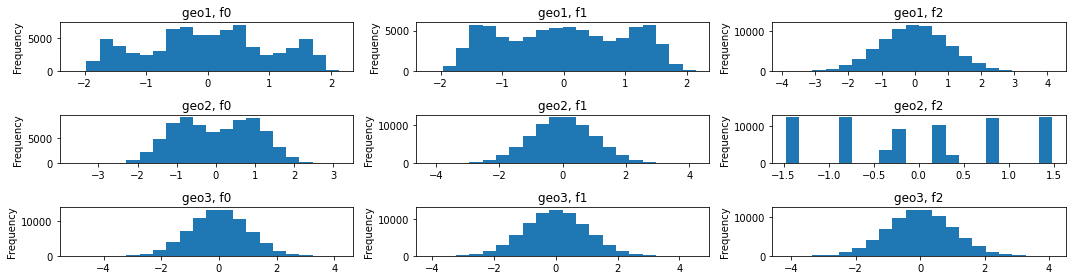

In [40]:
# Visualizamos si los valores están en la misma escala.
dataframes = []
dataframes.append(pd.DataFrame(x_geo1_train, columns= ['f0','f1','f2']))
dataframes.append(pd.DataFrame(x_geo2_train, columns= ['f0','f1','f2']))
dataframes.append(pd.DataFrame(x_geo3_train, columns= ['f0','f1','f2']))

plt.rcParams["figure.figsize"] = [10, 3.5]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(3, 3)

for i in range(0,3):
    for j in range(0,3):
        #dataframes[i].head()
        dataframes[i]['f'+str(j)].plot(kind= 'hist', figsize= (15,4), bins=20, ax= axes[i][j], title= (f'geo{i+1}, f{j}'))
        
       

plt.show()

# Entrenamiento del modelo

In [41]:
# Entrenamos un modelo de regresión lineal para este problema.

rl1 = LinearRegression()
rl1.fit(x_geo1_train, y_geo1_train)
geo1_predictions = rl1.predict(x_geo1_test)

rl2 = LinearRegression()
rl2.fit(x_geo2_train, y_geo2_train)
geo2_predictions = rl2.predict(x_geo2_test)

rl3 = LinearRegression()
rl3.fit(x_geo3_train, y_geo3_train)
geo3_predictions = rl3.predict(x_geo3_test)

In [42]:
# Guardamos las variables en un dataframe
resultados_df = pd.DataFrame()
resultados_df['y_geo1_test'] = pd.Series(y_geo1_test).reset_index(drop= True)
resultados_df['y_geo1_predictions'] = pd.Series(geo1_predictions).reset_index(drop= True)
resultados_df['y_geo1_mean'] = pd.Series(y_geo1_test).mean()

resultados_df['y_geo2_test'] = pd.Series(y_geo2_test).reset_index(drop= True)
resultados_df['y_geo2_predictions'] = pd.Series(geo2_predictions).reset_index(drop= True)
resultados_df['y_geo2_mean'] = pd.Series(y_geo2_test).mean()

resultados_df['y_geo3_test'] = pd.Series(y_geo3_test).reset_index(drop= True)
resultados_df['y_geo3_predictions'] = pd.Series(geo3_predictions).reset_index(drop= True)
resultados_df['y_geo3_mean'] = pd.Series(y_geo3_test).mean()

resultados_df.head()

,y_geo1_test,y_geo1_predictions,y_geo1_mean,y_geo2_test,y_geo2_predictions,y_geo2_mean,y_geo3_test,y_geo3_predictions,y_geo3_mean
0,122.073350,101.901017,92.325956,0.000000,0.844738,68.725381,117.441301,98.301916,95.150999
1,48.738540,78.217774,92.325956,53.906522,52.921612,68.725381,47.841249,101.592461,95.150999
2,131.338088,115.266901,92.325956,134.766305,135.110385,68.725381,45.883483,52.449099,95.150999
3,88.327757,105.618618,92.325956,107.813044,109.494863,68.725381,139.014608,109.922127,95.150999
4,36.959266,97.980185,92.325956,0.000000,-0.047292,68.725381,84.004276,72.411847,95.150999


In [43]:
# Visualizamos la métrica RECM para los valores de predicción y el conjunto promedio.

for i in range(1, 4):
    print(f'El RECM para para las predicciones del conjunto geo{i} es:', mean_squared_error(resultados_df[f'y_geo{i}_test'], resultados_df[f'y_geo{1}_predictions'])**0.5)
    print(f'La RECM para para la media del conjunto geo{i} es:\t', mean_squared_error(resultados_df[f'y_geo{i}_test'], resultados_df[f'y_geo{1}_mean'])**0.5)
    print('\n')

El RECM para para las predicciones del conjunto geo1 es: 37.75660035026169
La RECM para para la media del conjunto geo1 es:	 44.27662690128472


El RECM para para las predicciones del conjunto geo2 es: 56.71844714243868
La RECM para para la media del conjunto geo2 es:	 51.651714724821105


El RECM para para las predicciones del conjunto geo3 es: 50.704196296760536
La RECM para para la media del conjunto geo3 es:	 44.87134307792994




In [44]:
for i in range(1, 4):
    print(f'El RECM para para las predicciones del conjunto geo{i} es:', mean_squared_error(resultados_df[f'y_geo{i}_test'], resultados_df[f'y_geo{1}_predictions'])**0.5)
    print(f'La RECM para para la media del conjunto geo{i} es:\t', resultados_df[f'y_geo{i}_predictions'].mean())
    print('\n')

El RECM para para las predicciones del conjunto geo1 es: 37.75660035026169
La RECM para para la media del conjunto geo1 es:	 92.39879990657768


El RECM para para las predicciones del conjunto geo2 es: 56.71844714243868
La RECM para para la media del conjunto geo2 es:	 68.7128780391376


El RECM para para las predicciones del conjunto geo3 es: 50.704196296760536
La RECM para para la media del conjunto geo3 es:	 94.77102387765939




In [45]:
# Evaluamos la calidad de los modelos
for i in range(1,4):
    print(f'R2 geo{i}: ', r2_score(resultados_df[f'y_geo{i}_test'], resultados_df[f'y_geo{i}_predictions']))


R2 geo1:  0.2728287328173471
R2 geo2:  0.9996245232002449
R2 geo3:  0.19634705977280487


# Cálculo de beneficios

## Definición de variables

- De 500 puntos en estudio los 200 mejores entran a considerarse para el cálculo de beneficio.

- El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.

- Presupuesto para cada pozo es de 500.000 USD

In [46]:
# Número de pozos a ser estudiados
studied_wells = 500

# Number of best wells selected
n_best_wells = 200

# Ingreso por unidad de producto 
income_per_unit = 4500

# Presupuesto para cada pozo 
well_budget = 500_000

# Cantidad minima de unidades de producto para perforar un pozo
min_unit_req = well_budget/income_per_unit

# Media del volumen de la región 1.
geo1_mean = geo1['product'].mean()

# Media del volumen de la región 2.
geo2_mean = geo2['product'].mean()

# Media del volumen de la región 3.
geo3_mean = geo3['product'].mean()

print(f'Ingreso por unidad: {income_per_unit}')
print(f'Presupuesto para cada pozo: {well_budget}')
print(f'Cantidad minima(unidades) para perforación: {min_unit_req:.2f}')
print(f'Media de producto de la region 1: {geo1_mean:.2f}')
print(f'Media de producto de la region 2: {geo2_mean:.2f}')
print(f'Media de producto de la region 3: {geo3_mean:.2f}')

Ingreso por unidad: 4500
Presupuesto para cada pozo: 500000
Cantidad minima(unidades) para perforación: 111.11
Media de producto de la region 1: 92.50
Media de producto de la region 2: 68.83
Media de producto de la region 3: 95.00


**Conclusiones:**

- Mediante el cálculo de la media ninguna región sobrepasa el mínimo para no tener pérdidas.
- La media de la región 1 y 3 son las mas altas acercándose al mínimo de producto requerido.

## Función para el cálculo de ganancias

In [47]:
# Esta función calcula los beneficios de los mejores pozos ordenados por su cantidad de reservas
def profit(target, predictions, count):
    pred_sorted=  predictions.sort_values(ascending= False)
    selected = target[pred_sorted.index][:count]
    
    return (income_per_unit * selected.sum()) - well_budget * count

## Cálculo de beneficio por región

In [48]:
# Aplicamos la función a las diferentes regiones
for i in range(1,4):
    print(f'EL beneficio de la región geo {i} es: {profit(resultados_df[f"y_geo{i}_test"], resultados_df[f"y_geo{i}_predictions"], n_best_wells).round(2)}')

EL beneficio de la región geo 1 es: 33591411.14
EL beneficio de la región geo 2 es: 24150866.97
EL beneficio de la región geo 3 es: 25985717.59


**Conclusiones:**

- Realizando un análisis preliminar de los ingresos por región se sugiere realizar el estudio en la región geo 1, ya que obtiene mayor beneficio, mas adelante realizaremos las pruebas necesarias para validar esta propuesta.

# Cálculo de Riesgo 

In [62]:
# Definimos el estado randómico
state = np.random.RandomState(42) 

# Definimos un diccionario para guardar los valores de nuestras regiones  
values = {   
    '1':[],
    '2':[],
    '3':[]
}

# Aplicacamos bootstraping para generar un valor confiable del valor esperado.
for i in range(1,4):
    for j in range(1000):
        target_subsample = resultados_df[f'y_geo{i}_test'].sample(n= studied_wells, replace= True, random_state= state)
        predictions_subsample = resultados_df[f'y_geo{i}_predictions'][target_subsample.index]
        values[str(i)].append(profit(target_subsample, predictions_subsample, n_best_wells))

for k in values:
    values[k] = pd.Series(values[k])

# Obtenemos los mejores resultados del intervalo de confianza de 95%
lowers = []
[lowers.append(values[i].quantile(0.05)) for i in values]

# Obtenemos los mejores resultados del intervalo de confianza de 5%
uppers = []
[uppers.append(values[i].quantile(0.95)) for i in values]

#Obtenemos las medias de los resultados del cálculos de ingreso de 1000 submuestras 
means = []
[means.append(values[i].mean()) for i in values]

[print(f"El ingreso promedio para la región geo {i+1} es: {means[i]}") for i in range(3)]
print('\n')
[print(f"El cuantil del 5% de la región geo {i+1} es: {lowers[i]}") for i in range(3)]
print('\n')
[print(f"El cuantil del 95% de la región geo {i+1} es: {uppers[i]}") for i in range(3)]
print('\n')
[print(f'La probabilidad de obtener perdida para la región geo {i+1} es: {((values[str(i+1)] < 0).mean())*100}%') for i in range(3)]


El ingreso promedio para la región geo 1 es: 4278475.604625247
El ingreso promedio para la región geo 2 es: 5115302.181485244
El ingreso promedio para la región geo 3 es: 4085456.812149357


El cuantil del 5% de la región geo 1 es: -97081.1899262448
El cuantil del 5% de la región geo 2 es: 1494857.6412835107
El cuantil del 5% de la región geo 3 es: -561462.5067393221


El cuantil del 95% de la región geo 1 es: 8651276.42373631
El cuantil del 95% de la región geo 2 es: 8629551.702553822
El cuantil del 95% de la región geo 3 es: 8695152.794494638


La probabilidad de obtener perdida para la región geo 1 es: 5.5%
La probabilidad de obtener perdida para la región geo 2 es: 0.6%
La probabilidad de obtener perdida para la región geo 3 es: 7.5%


[None, None, None]

**Conclusiones:**

- Una vez aplicado la técnica de bootstraping para las tres regiones, los resultados son reveladores y nos indican que geo 2 es la región mas idonea para la extracción de petroleo ya que tiene un promedio de beneficios de 5,115,302.18 USD y un beneficio de 1,494,857.00 de beneficio con un 95% de certeza. Mientras que las otras regiones con un 95% de certeza tendrémos beneficio negativo, en otras palabras pérdida.